# **Chapter 03 시계열 모델링**
정상정 **(Stationary)** 의 개념을 분석한다

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import warnings
# plt.style.use('seaborn')
# plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

## **1 시계열 데이터 분해**
### **01 Loading the DataSet**
- 'GC=F' : Gold Price Code

In [2]:
DATA_FILENAME = 'data/stock-amazon.pkl'

# Loading the DataSet
import pandas as pd
import yfinance as yf
try:
    data = pd.read_pickle(DATA_FILENAME)
except FileNotFoundError:
    data = yf.download('AMZN', start='2010-01-01', end='2022-01-01',
        progress=False, auto_adjust=True)
    data.to_pickle(DATA_FILENAME)
data.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,137.089996,137.279999,134.520004,134.520004,4523000
2010-01-04,136.250000,136.610001,133.139999,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,8851900


### **02 Data Pre Processing**

In [3]:
# Data Pre Processing
data.rename(columns={'Close':'price'}, inplace=True)
df = data[['price']]
df = df.resample('M').last()  # 월간 데이터로 변환하기

# 이동평균과 표준편차를 추가 한다
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()

### **03 Visualization**
```python
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
cf.set_config_file(world_readable=True, theme='pearl', offline=True) # set up settings (run it once)
init_notebook_mode(connected=True)  # initialize notebook display
df.iplot(title="Gold Price") # Plotly from DataFrame
```

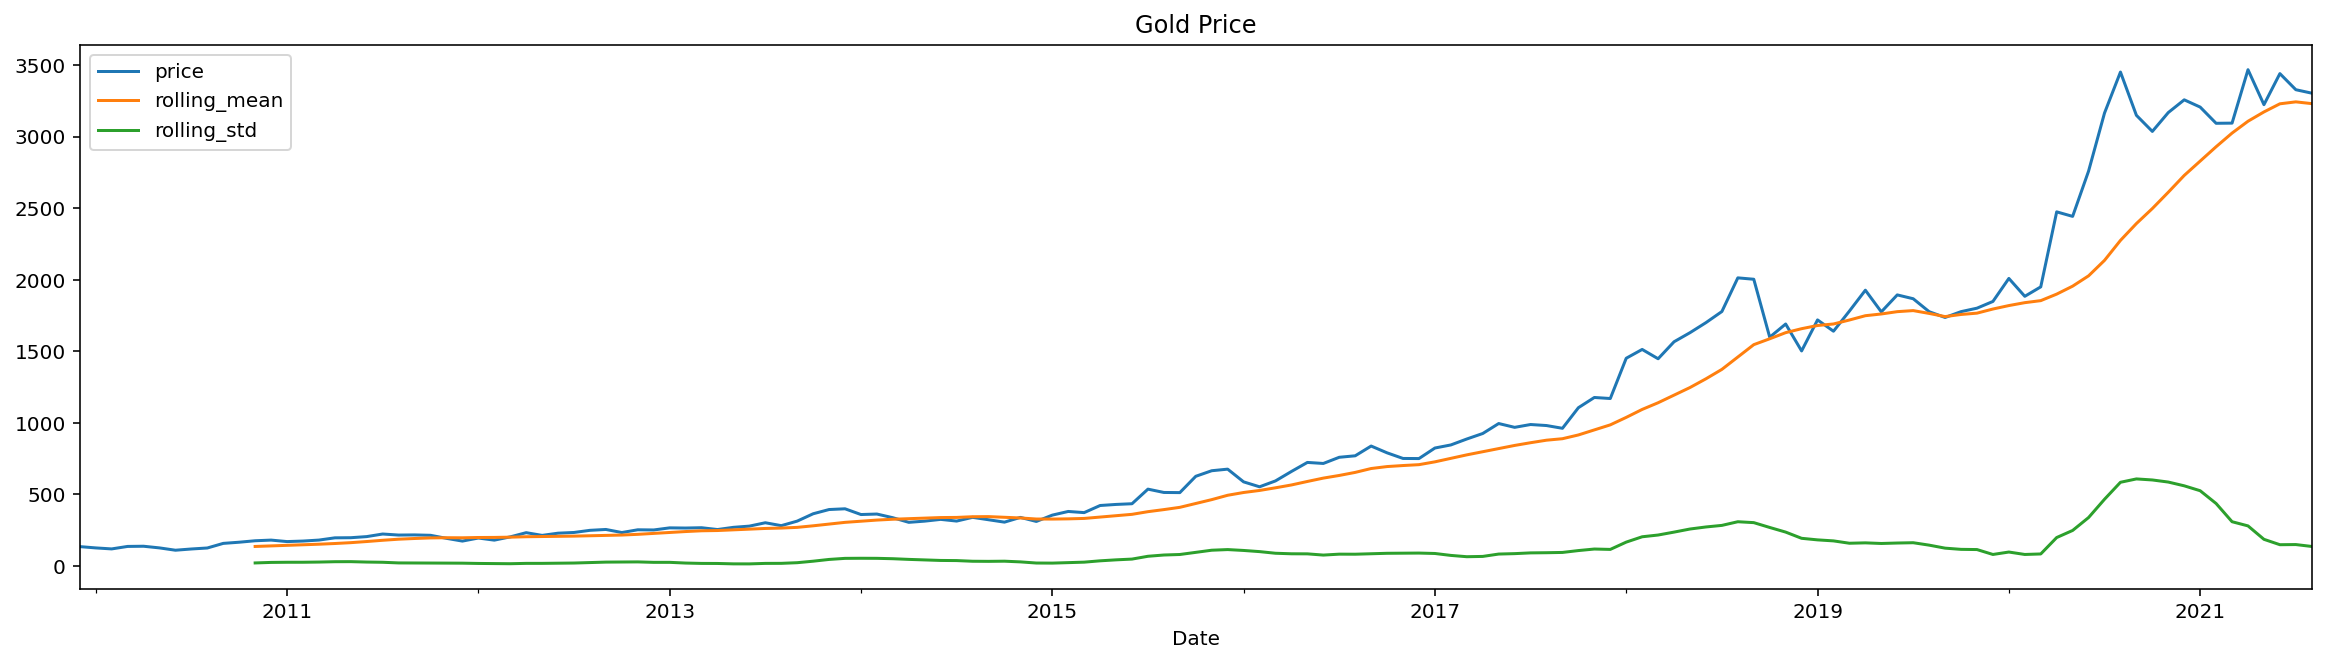

In [4]:
# Visualization
plt.rcParams['figure.figsize'] = [20, 5]
df.plot(title='Gold Price')
plt.show()

### **04 승산적 모델을 활용하여 계절성 특징을 찾는다**

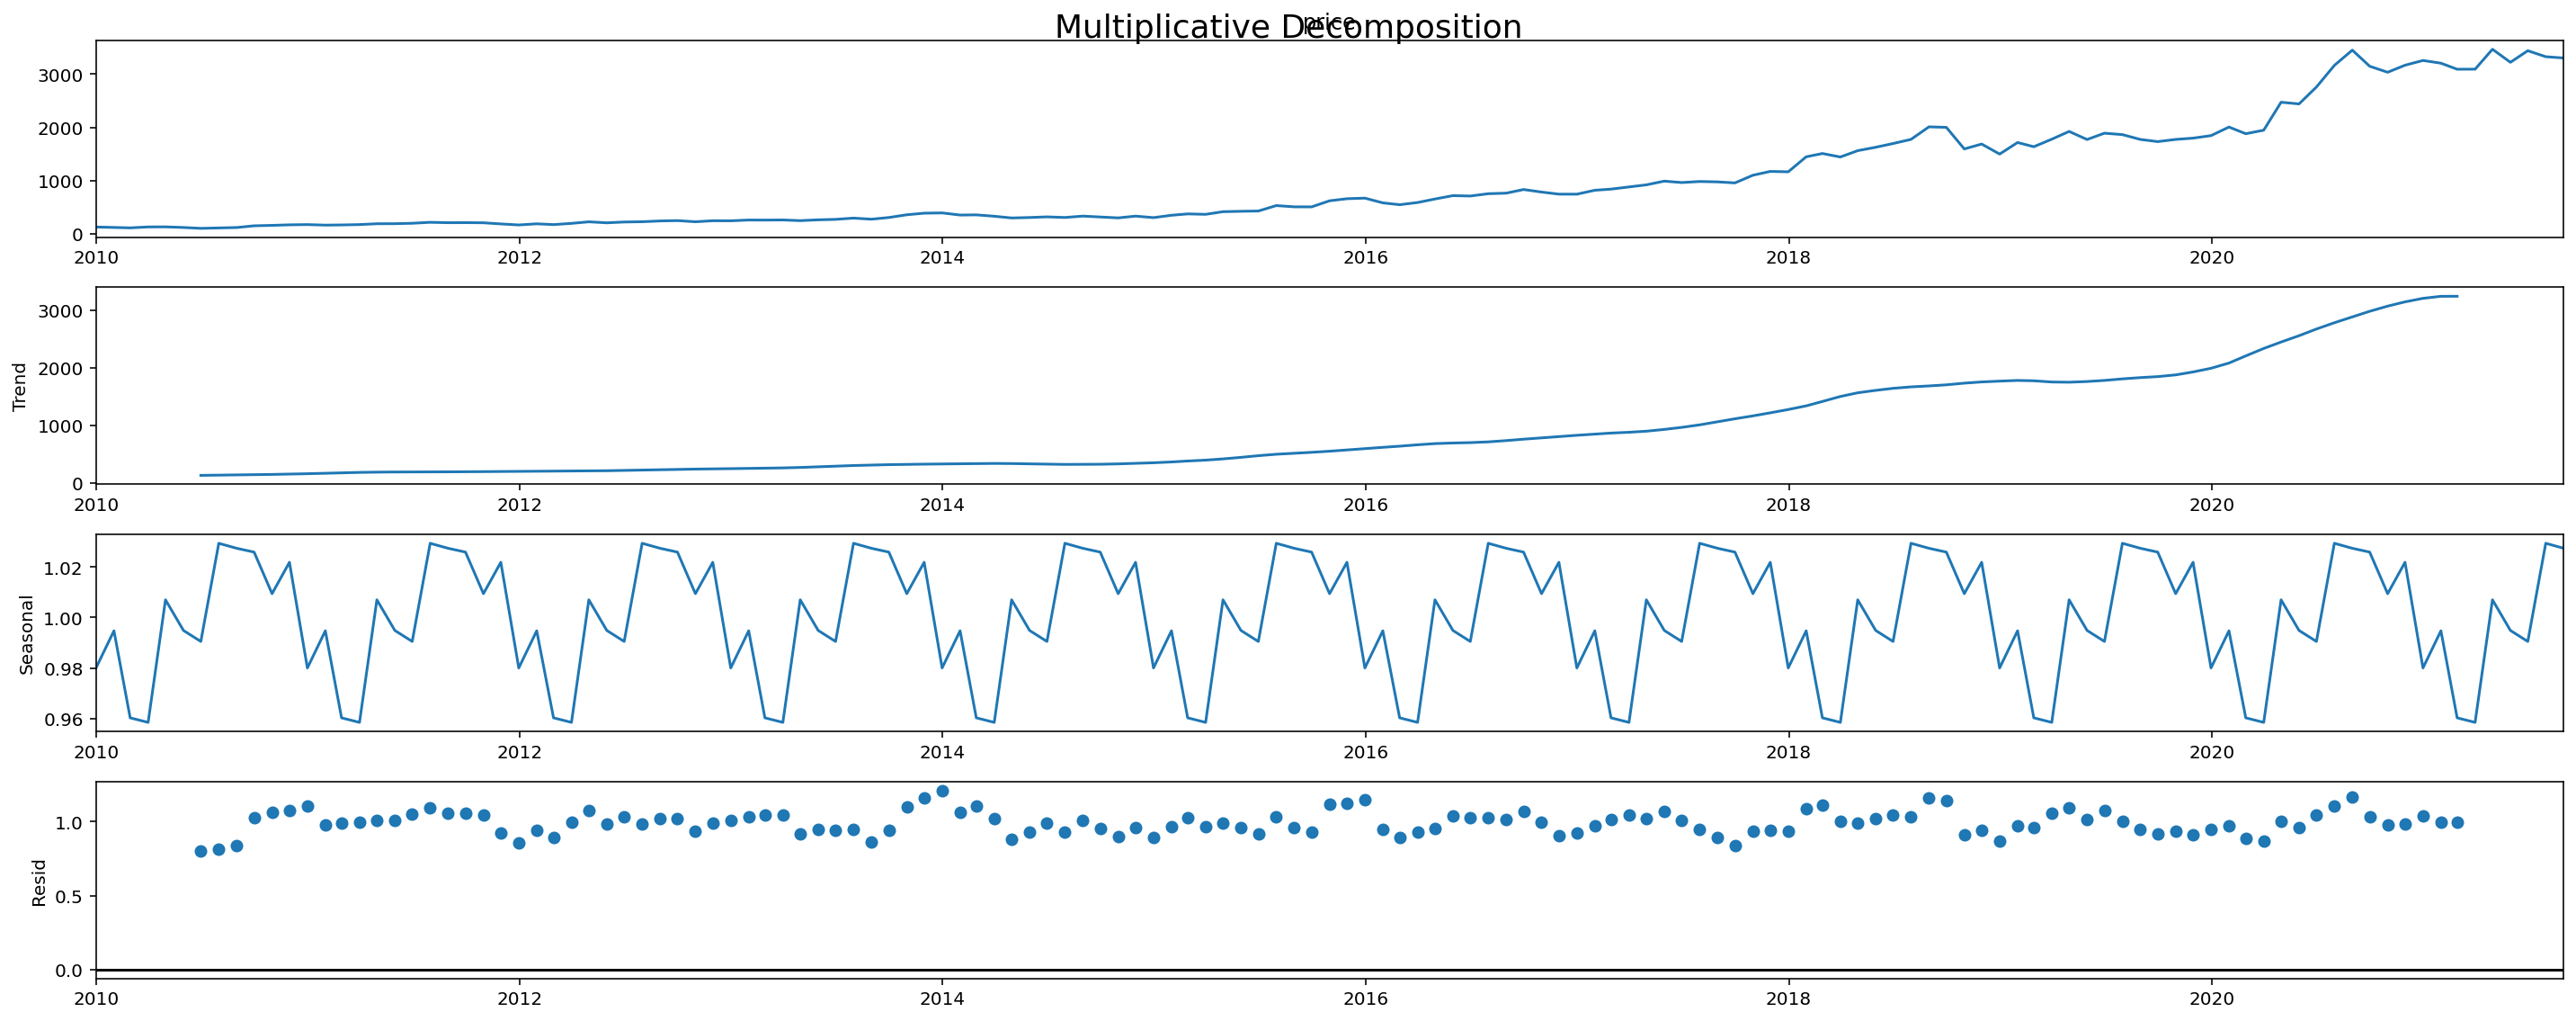

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [20, 8]
decomposition_results = seasonal_decompose(df.price, model='multiplicative')
decomposition_results.plot().suptitle('Multiplicative Decomposition', fontsize=18)
plt.show()

## **2 ProPhet 을 활용한 시계열 데이터 분해**

[SettingWithCopyWarning: DataFrame 에 대해서](https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning)

https://github.com/facebook/prophet
```r
! pip install pystan
! pip install fbprophet
```
### **01 Loading the DataSet**
위 아마존 데이터를 시계열 분석한 뒤, 1년 변화를 예측합니다

In [6]:
df = data[['price']]
df.head(3)

,price
Date,
2009-12-31,134.520004
2010-01-04,133.899994
2010-01-05,134.690002


In [7]:
df.reset_index(drop=False, inplace=True)

In [8]:
df.head(3)

,Date,price
0,2009-12-31,134.520004
1,2010-01-04,133.899994
2,2010-01-05,134.690002


In [9]:
df.rename(columns={'Date':'ds', 'price':'y'}, inplace=True)

/home/buffet/Coding/Python/Nlpy/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df.head(3)

,ds,y
0,2009-12-31,134.520004
1,2010-01-04,133.899994
2,2010-01-05,134.690002
